In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go

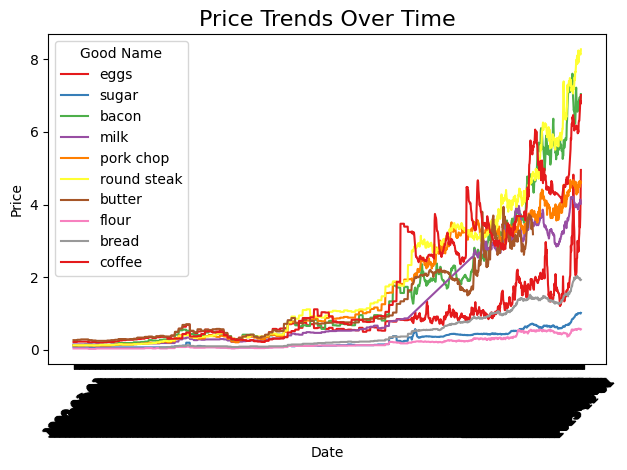

In [4]:
goods = pd.read_csv("/content/good-prices.csv")


goods = goods.sort_values(by="Date", ascending=True)

# Plot using lineplot, which can handle datetime directly
a = sns.lineplot(
    x="Date",
    y="Price",
    data=goods,
    hue="Good Name",
    palette="Set1"
)

# Customize labels and title
a.set(ylabel="Price")
a.set_title("Price Trends Over Time", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [5]:


# Sort the data by Date to ensure the proper order (earlier dates on the left)
goods = goods.sort_values("Date", ascending=True)

# Create the line plot using Plotly Graph Objects
fig = go.Figure()

# Add a trace for each 'Good Name'
for good_name in goods["Good Name"].unique():
    filtered_data = goods[goods["Good Name"] == good_name]
    fig.add_trace(go.Scatter(
        x=filtered_data["Date"],  # x-axis = Date
        y=filtered_data["Price"],  # y-axis = Price
        mode="lines",  # Line plot
        name=good_name  # Legend by Good Name
    ))

# Update layout to make it more readable
fig.update_layout(
    title="Price Trends Over Time",
    xaxis_title="Date",
    yaxis_title="Price",
    title_font_size=16,
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    hovermode="x unified"  # Make the hover show all points for the same date
)

# Show the plot
fig.show()